In this assignment students have to transform iris data into 3 dimensions
and plot a 3d chart with transformed dimensions and colour each data
point with specific class.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


In [4]:
#lets get the dataset for iris and store it in a the variable iris
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# We will need to separate the target variable
x = iris.drop('species', axis = 1)
y = iris.species

In [7]:
#Now we will standardize the features before performing pca
from sklearn.preprocessing import StandardScaler

In [8]:
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)

In [15]:
pca_x = pca.fit_transform(x)
pca_x = pd.DataFrame(pca_x, columns = ['PC1', 'PC2', 'PC3'])

In [18]:
final_df = pd.concat([pca_x, y], axis = 1)

In [19]:
final_df.head()

,PC1,PC2,PC3,species
0,-2.264703,0.480027,-0.127706,setosa
1,-2.080961,-0.674134,-0.234609,setosa
2,-2.364229,-0.341908,0.044201,setosa
3,-2.299384,-0.597395,0.091290,setosa
4,-2.389842,0.646835,0.015738,setosa


In [20]:
x_val = final_df['PC1']
y_val = final_df['PC2']
z_val = final_df['PC3']

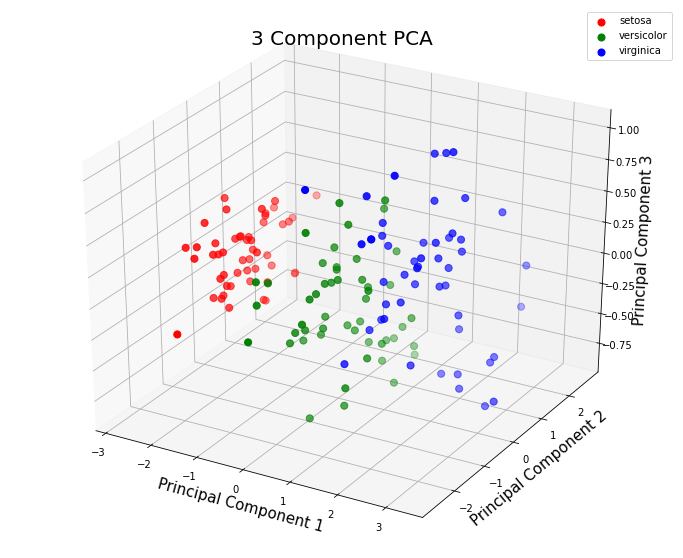

In [29]:
#making the 3d plot

fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 Component PCA', fontsize = 20)

targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'blue']

for target, color in zip(targets, colors):
    index = final_df['species'] == target
    ax.scatter(final_df.loc[index, 'PC1'],
               final_df.loc[index, 'PC2'],
               final_df.loc[index, 'PC3'],
               c = color,
               s = 50
              )
ax.legend(targets)
ax.grid()
plt.show()

